In [30]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train data

In [31]:


# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_csv("hf://datasets/openadmet/openadmet-expansionrx-challenge-train-data/expansion_data_train.csv")

In [32]:
len(df)

5326

In [33]:
TARGET_COLUMNS = [
    'LogD', 'KSOL', 'HLM CLint', 'MLM CLint',
    'Caco-2 Permeability Papp A>B', 'Caco-2 Permeability Efflux', 'MPPB',
    'MBPB', 'MGMB'
]
df.columns

Index(['Molecule Name', 'SMILES', 'LogD', 'KSOL', 'HLM CLint', 'MLM CLint',
       'Caco-2 Permeability Papp A>B', 'Caco-2 Permeability Efflux', 'MPPB',
       'MBPB', 'MGMB'],
      dtype='object')

In [34]:
(~df[TARGET_COLUMNS].isnull()).sum()

LogD                            5039
KSOL                            5128
HLM CLint                       3759
MLM CLint                       4522
Caco-2 Permeability Papp A>B    2157
Caco-2 Permeability Efflux      2161
MPPB                            1302
MBPB                             975
MGMB                             222
dtype: int64

<Axes: >

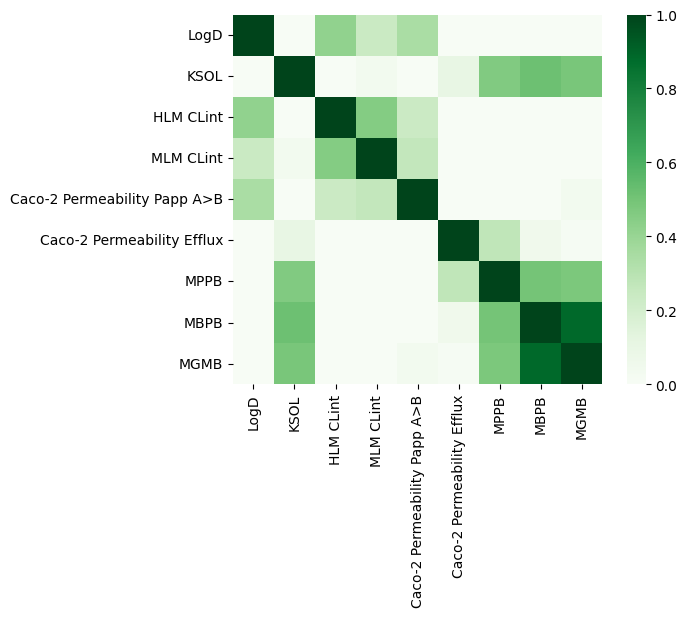

In [35]:
corrs = df.dropna().corr(numeric_only=True).round(3)#.sort_values('target_reg')
sns.heatmap(corrs,
            cmap = 'Greens',
            square=True,
            vmin = 0)

In [36]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
phik_overview = df.phik_matrix().round(2) #.sort_values('target_reg')

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

interval columns not set, guessing: ['LogD', 'KSOL', 'HLM CLint', 'MLM CLint', 'Caco-2 Permeability Papp A>B', 'Caco-2 Permeability Efflux', 'MPPB', 'MBPB', 'MGMB']


/Users/latticetower/mamba/envs/kaggle_py3.11/lib/python3.11/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Molecule Name is large: 5326. Are you sure this is not an interval variable? Analysis for pairs of variables including Molecule Name can be slow.
  warnings.warn(
/Users/latticetower/mamba/envs/kaggle_py3.11/lib/python3.11/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable SMILES is large: 5326. Are you sure this is not an interval variable? Analysis for pairs of variables including SMILES can be slow.
  warnings.warn(
/Users/latticetower/mamba/envs/kaggle_py3.11/lib/python3.11/site-packages/phik/bivariate.py:255: UserWarning: Many cells: 28366276. Are interval variables set correctly?
  warnings.warn(
